In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #print(city_weather)
       # print(city_weather["weather"][0]['description'])
        # Parse out the needed data.
        city_lng = city_weather["coord"]["lon"]
        city_lat = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]
                
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": city_description,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | san jose
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | eyl
Processing Record 6 of Set 1 | qianan
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | nhulunbuy
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bismarck
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | matara
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | portree
Processing Record 19 of Set 1 | fredericksburg
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 2

Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | keti bandar
Processing Record 40 of Set 4 | baghdad
Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | yinchuan
Processing Record 43 of Set 4 | namatanai
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | srednekolymsk
Processing Record 46 of Set 4 | caruray
Processing Record 47 of Set 4 | mandalgovi
Processing Record 48 of Set 4 | jieshi
Processing Record 49 of Set 4 | cabra
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | sechura
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | kargasok
Processing Record 6 of Set 5 | nanortalik
Processing Record 7 of Set 5 | deputatskiy
Processing Record 8 of Set 5 | qasigiannguit
Processing Record 9 of Set 5 | kolarovo
Processing Record 10 of Set 5 | formosa
Processing Record 

Processing Record 32 of Set 8 | lavrentiya
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | dorado
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | inirida
Processing Record 38 of Set 8 | khuzdar
Processing Record 39 of Set 8 | jomalig
City not found. Skipping...
Processing Record 40 of Set 8 | teguise
Processing Record 41 of Set 8 | tessalit
Processing Record 42 of Set 8 | huarmey
Processing Record 43 of Set 8 | mombasa
Processing Record 44 of Set 8 | makakilo city
Processing Record 45 of Set 8 | linares
Processing Record 46 of Set 8 | czluchow
Processing Record 47 of Set 8 | venancio aires
Processing Record 48 of Set 8 | goderich
Processing Record 49 of Set 8 | margate
Processing Record 50 of Set 8 | pakxe
Processing Record 1 of Set 9 | tura
Processing Record 2 of Set 9 | marsa matruh
Processing Record 3 of Set 9 | manacapuru
Processing Record 4 of Set 9 | berdigestyakh
Processing Record 5 of Set 9 | san pa

Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | rock sound
Processing Record 22 of Set 12 | kidal
Processing Record 23 of Set 12 | tuy hoa
Processing Record 24 of Set 12 | oksfjord
Processing Record 25 of Set 12 | siguiri
Processing Record 26 of Set 12 | pochutla
Processing Record 27 of Set 12 | flin flon
Processing Record 28 of Set 12 | wattegama
Processing Record 29 of Set 12 | biloela
Processing Record 30 of Set 12 | mudgee
Processing Record 31 of Set 12 | bathsheba
Processing Record 32 of Set 12 | saint-joseph
Processing Record 33 of Set 12 | gulshat
City not found. Skipping...
Processing Record 34 of Set 12 | luwuk
Processing Record 35 of Set 12 | shunyi
Processing Record 36 of Set 12 | vestmanna
Processing Record 37 of Set 12 | dodge city
Processing Record 38 of Set 12 | butembo
Processing Record 39 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 40 of Set 12 | okato
-----------------------------
Data Retrieval Complete      
----------

In [17]:
# Check that over 500 cities are in city_data
print(len(city_data))

548


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Date
0,Victoria,HK,22.2855,114.1577,94.96,76,14,8.99,few clouds,2022-07-25 01:50:03
1,San Jose,US,37.3394,-121.8950,85.28,53,0,13.80,clear sky,2022-07-25 01:50:03
2,Rikitea,PF,-23.1203,-134.9692,75.45,80,21,15.52,few clouds,2022-07-25 01:54:17
3,Saint-Philippe,RE,-21.3585,55.7679,63.99,76,35,5.97,scattered clouds,2022-07-25 01:49:57
4,Eyl,SO,7.9803,49.8164,75.85,70,29,21.30,scattered clouds,2022-07-25 01:54:18
5,Qianan,CN,44.9932,124.0581,77.36,64,20,5.39,few clouds,2022-07-25 01:54:18
6,Jamestown,US,42.0970,-79.2353,74.01,88,20,8.05,few clouds,2022-07-25 01:53:25
7,Upernavik,GL,72.7868,-56.1549,38.03,98,95,9.26,overcast clouds,2022-07-25 01:54:20
8,Klaksvik,FO,62.2266,-6.5890,49.12,91,93,21.18,overcast clouds,2022-07-25 01:54:21
9,Nhulunbuy,AU,-12.2333,136.7667,83.01,61,16,13.80,few clouds,2022-07-25 01:54:21


In [19]:
# Create the output file (CSV).
output_data_file = "WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/24/22'

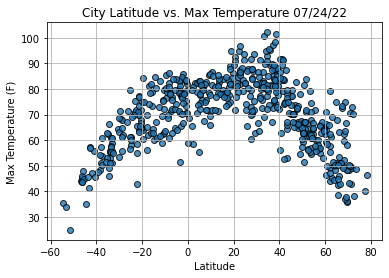

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("WeatherFig1.png")

# Show plot.
plt.show()

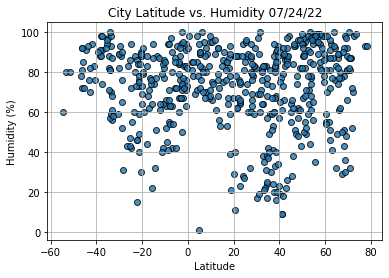

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("WeatherFig2.png")
# Show plot.
plt.show()

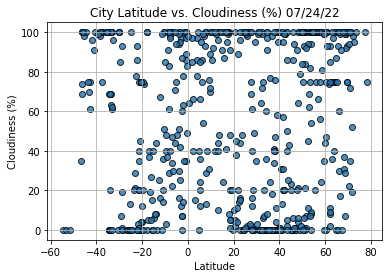

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("WeatherFig3.png")
# Show plot.
plt.show()

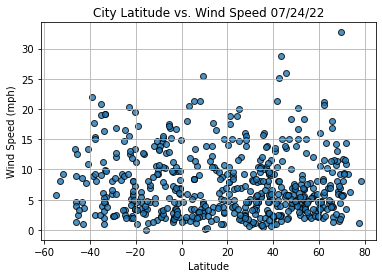

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("WeatherFig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                                Matara
Country                                 LK
Lat                                 5.9485
Lng                                80.5353
Max Temp                             79.43
Humidity                                82
Cloudiness                              86
Wind Speed                           13.44
Current Description        overcast clouds
Date                   2022-07-25 01:54:23
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Date
0,Victoria,HK,22.2855,114.1577,94.96,76,14,8.99,few clouds,2022-07-25 01:50:03
1,San Jose,US,37.3394,-121.8950,85.28,53,0,13.80,clear sky,2022-07-25 01:50:03
4,Eyl,SO,7.9803,49.8164,75.85,70,29,21.30,scattered clouds,2022-07-25 01:54:18
5,Qianan,CN,44.9932,124.0581,77.36,64,20,5.39,few clouds,2022-07-25 01:54:18
6,Jamestown,US,42.0970,-79.2353,74.01,88,20,8.05,few clouds,2022-07-25 01:53:25


In [36]:
# Create a Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

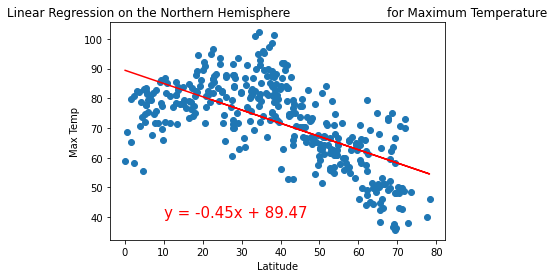

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

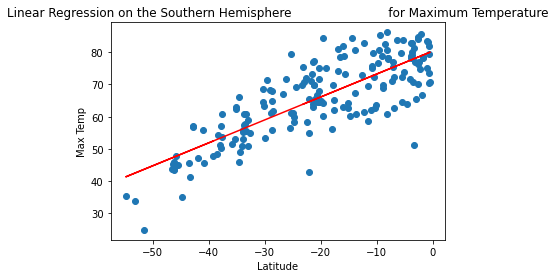

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

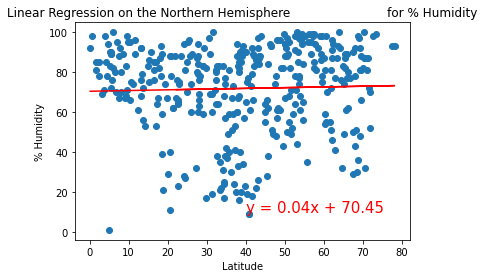

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

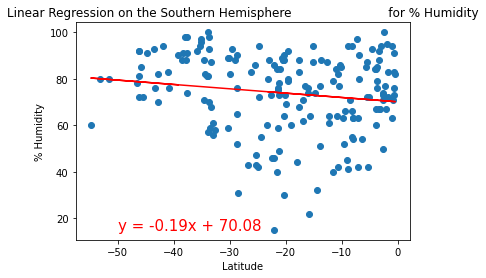

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

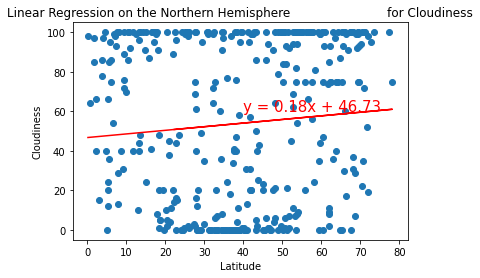

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,60))

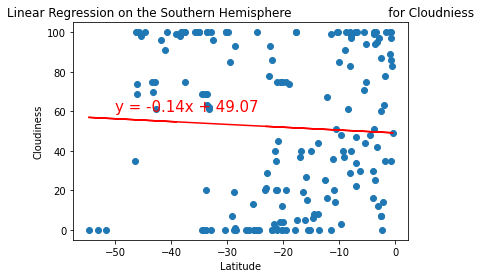

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudniess', 'Cloudiness',(-50,60))

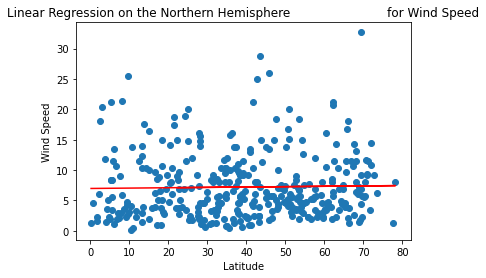

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

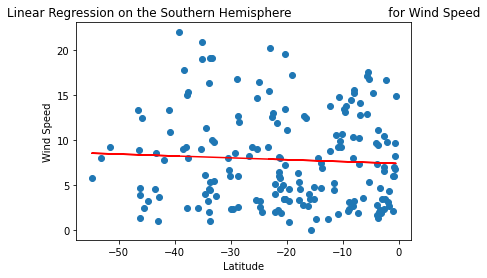

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))